<a href="https://colab.research.google.com/github/priyarajmohan/ML_projects/blob/main/Unsupervised_KMeans_ev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
ev = pd.read_csv('/content/electric_vehicles_spec_2025.csv.csv')

In [ ]:
ev

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,Abarth,500e Convertible,155,37.8,Lithium-ion,192.0,235.0,156,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1904/Abarth-500e-C...
1,Abarth,500e Hatchback,155,37.8,Lithium-ion,192.0,235.0,149,225,7.0,...,0.0,185,4,FWD,B - Compact,3673,1683,1518,Hatchback,https://ev-database.org/car/1903/Abarth-500e-H...
2,Abarth,600e Scorpionissima,200,50.8,Lithium-ion,102.0,345.0,158,280,5.9,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3057/Abarth-600e-S...
3,Abarth,600e Turismo,200,50.8,Lithium-ion,102.0,345.0,158,280,6.2,...,0.0,360,5,FWD,JB - Compact,4187,1779,1557,SUV,https://ev-database.org/car/3056/Abarth-600e-T...
4,Aiways,U5,150,60.0,Lithium-ion,NaN,310.0,156,315,7.5,...,NaN,496,5,FWD,JC - Medium,4680,1865,1700,SUV,https://ev-database.org/car/1678/Aiways-U5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,Zeekr,7X Premium RWD,210,71.0,Lithium-ion,NaN,440.0,148,365,6.0,...,2000.0,539,5,RWD,JD - Large,4787,1930,1650,SUV,https://ev-database.org/car/3081/Zeekr-7X-Prem...
474,Zeekr,X Core RWD (MY25),190,49.0,Lithium-ion,NaN,343.0,148,265,5.9,...,1600.0,362,5,RWD,JB - Compact,4432,1836,1566,SUV,https://ev-database.org/car/3197/Zeekr-X-Core-RWD
475,Zeekr,X Long Range RWD (MY25),190,65.0,Lithium-ion,NaN,343.0,146,360,5.6,...,1600.0,362,5,RWD,JB - Compact,4432,1836,1566,SUV,https://ev-database.org/car/3198/Zeekr-X-Long-...
476,Zeekr,X Privilege AWD (MY25),190,65.0,Lithium-ion,NaN,543.0,153,350,3.8,...,1600.0,362,5,AWD,JB - Compact,4432,1836,1566,SUV,https://ev-database.org/car/3199/Zeekr-X-Privi...


In [ ]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478 entries, 0 to 477
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      478 non-null    object 
 1   model                      477 non-null    object 
 2   top_speed_kmh              478 non-null    int64  
 3   battery_capacity_kWh       478 non-null    float64
 4   battery_type               478 non-null    object 
 5   number_of_cells            276 non-null    float64
 6   torque_nm                  471 non-null    float64
 7   efficiency_wh_per_km       478 non-null    int64  
 8   range_km                   478 non-null    int64  
 9   acceleration_0_100_s       478 non-null    float64
 10  fast_charging_power_kw_dc  477 non-null    float64
 11  fast_charge_port           477 non-null    object 
 12  towing_capacity_kg         452 non-null    float64
 13  cargo_volume_l             477 non-null    object 

In [ ]:
ev.isnull().sum()

,0
brand,0
model,1
top_speed_kmh,0
battery_capacity_kWh,0
battery_type,0
number_of_cells,202
torque_nm,7
efficiency_wh_per_km,0
range_km,0
acceleration_0_100_s,0


In [ ]:
ev['number_of_cells'] = ev['number_of_cells'].fillna(ev['number_of_cells'].mean())

In [ ]:
ev.isnull().sum()

,0
brand,0
model,1
top_speed_kmh,0
battery_capacity_kWh,0
battery_type,0
number_of_cells,0
torque_nm,7
efficiency_wh_per_km,0
range_km,0
acceleration_0_100_s,0


In [ ]:
ev['towing_capacity_kg']=ev['towing_capacity_kg'].fillna(ev['towing_capacity_kg'].mean())

In [ ]:
ev.isnull().sum()


,0
brand,0
model,1
top_speed_kmh,0
battery_capacity_kWh,0
battery_type,0
number_of_cells,0
torque_nm,7
efficiency_wh_per_km,0
range_km,0
acceleration_0_100_s,0


In [ ]:
ev.dropna(inplace=True)

In [ ]:
ev.isnull().sum()

,0
brand,0
model,0
top_speed_kmh,0
battery_capacity_kWh,0
battery_type,0
number_of_cells,0
torque_nm,0
efficiency_wh_per_km,0
range_km,0
acceleration_0_100_s,0


In [ ]:
ev.duplicated().sum()

np.int64(0)

In [ ]:
sc = StandardScaler()

In [ ]:
ev.info()

<class 'pandas.core.frame.DataFrame'>
Index: 468 entries, 0 to 476
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand                      468 non-null    object 
 1   model                      468 non-null    object 
 2   top_speed_kmh              468 non-null    int64  
 3   battery_capacity_kWh       468 non-null    float64
 4   battery_type               468 non-null    object 
 5   number_of_cells            468 non-null    float64
 6   torque_nm                  468 non-null    float64
 7   efficiency_wh_per_km       468 non-null    int64  
 8   range_km                   468 non-null    int64  
 9   acceleration_0_100_s       468 non-null    float64
 10  fast_charging_power_kw_dc  468 non-null    float64
 11  fast_charge_port           468 non-null    object 
 12  towing_capacity_kg         468 non-null    float64
 13  cargo_volume_l             468 non-null    object 
 14 

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
for i in ev.select_dtypes(include='object').columns:
  ev[i] = le.fit_transform(ev[i])


In [ ]:
ev

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,0,45,155,37.8,0,192.000000,235.0,156,225,7.0,...,0.000000,9,4,1,1,3673,1683,1518,2,82
1,0,46,155,37.8,0,192.000000,235.0,149,225,7.0,...,0.000000,9,4,1,1,3673,1683,1518,2,81
2,0,50,200,50.8,0,102.000000,345.0,158,280,5.9,...,0.000000,38,5,1,9,4187,1779,1557,4,358
3,0,51,200,50.8,0,102.000000,345.0,158,280,6.2,...,0.000000,38,5,1,9,4187,1779,1557,4,357
4,1,388,150,60.0,0,485.293478,310.0,156,315,7.5,...,1052.261062,85,5,1,10,4680,1865,1700,4,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,57,55,210,94.0,0,485.293478,710.0,173,450,3.8,...,2000.000000,104,5,0,11,4787,1930,1650,4,383
473,57,56,210,71.0,0,485.293478,440.0,148,365,6.0,...,2000.000000,104,5,2,11,4787,1930,1650,4,381
474,57,393,190,49.0,0,485.293478,343.0,148,265,5.9,...,1600.000000,40,5,2,9,4432,1836,1566,4,464
475,57,394,190,65.0,0,485.293478,343.0,146,360,5.6,...,1600.000000,40,5,2,9,4432,1836,1566,4,465


In [ ]:
ev.describe()

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
count,468.000000,468.000000,468.000000,468.000000,468.0,468.000000,468.000000,468.000000,468.000000,468.000000,...,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000
mean,30.647436,233.500000,185.008547,74.058120,0.0,403.196558,499.698718,163.205128,392.617521,6.903419,...,1055.621341,71.726496,5.260684,0.878205,8.237179,4678.777778,1886.685897,1602.271368,4.147436,233.500000
std,17.233056,135.244224,33.530387,20.210529,0.0,527.959570,241.289924,34.529642,101.962210,2.710711,...,712.741095,37.760685,1.007676,0.812190,4.144776,367.379169,73.419752,130.466947,1.327382,135.244224
min,0.000000,0.000000,125.000000,21.300000,0.0,72.000000,113.000000,109.000000,135.000000,2.200000,...,0.000000,0.000000,2.000000,0.000000,0.000000,3620.000000,1610.000000,1329.000000,0.000000,0.000000
25%,15.000000,116.750000,160.000000,60.000000,0.0,216.000000,310.000000,143.000000,323.750000,4.800000,...,500.000000,41.000000,5.000000,0.000000,4.000000,4440.000000,1849.000000,1515.000000,4.000000,116.750000
50%,35.000000,233.500000,180.000000,75.800000,0.0,384.000000,435.000000,155.000000,395.000000,6.600000,...,1052.261062,72.000000,5.000000,1.000000,10.000000,4720.000000,1887.000000,1597.000000,4.000000,233.500000
75%,44.000000,350.250000,201.000000,90.600000,0.0,485.293478,679.000000,178.000000,470.000000,8.225000,...,1600.000000,104.000000,5.000000,2.000000,11.000000,4961.000000,1938.250000,1665.000000,5.000000,350.250000
max,57.000000,467.000000,325.000000,118.000000,0.0,6600.000000,1350.000000,370.000000,685.000000,19.100000,...,2500.000000,137.000000,9.000000,2.000000,14.000000,5908.000000,2080.000000,1986.000000,7.000000,467.000000


In [ ]:
sc = StandardScaler()

In [ ]:
for i in ev.columns:
  ev[i] = sc.fit_transform(ev[[i]])

In [ ]:
ev

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,towing_capacity_kg,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url
0,-1.780313,-1.395266,-0.895923,-1.795941,0.0,-0.400452,-1.098189,-0.208888,-1.645677,0.035668,...,-1.482658,-1.662936,-1.252420,0.150119,-1.747965,-2.740640,-2.777234,-0.646612,-1.619530,-1.121394
1,-1.780313,-1.387864,-0.895923,-1.795941,0.0,-0.400452,-1.098189,-0.411830,-1.645677,0.035668,...,-1.482658,-1.662936,-1.252420,0.150119,-1.747965,-2.740640,-2.777234,-0.646612,-1.619530,-1.128796
2,-1.780313,-1.358257,0.447579,-1.152024,0.0,-0.571102,-0.641818,-0.150905,-1.105684,-0.370564,...,-1.482658,-0.894120,-0.258975,0.150119,0.184241,-1.340043,-1.468285,-0.347366,-0.111192,0.921542
3,-1.780313,-1.350855,0.447579,-1.152024,0.0,-0.571102,-0.641818,-0.150905,-1.105684,-0.259774,...,-1.482658,-0.894120,-0.258975,0.150119,0.184241,-1.340043,-1.468285,-0.347366,-0.111192,0.914140
4,-1.722223,1.143600,-1.045201,-0.696328,0.0,0.155665,-0.787027,-0.208888,-0.762053,0.220318,...,-0.004720,0.351893,-0.258975,0.150119,0.425766,0.003330,-0.295685,0.749870,-0.111192,-1.565511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,1.530823,-1.321247,0.746135,0.987763,0.0,0.155665,0.872504,0.283969,0.563384,-1.146098,...,1.326413,0.855600,-0.258975,-1.082438,0.667292,0.294894,0.590583,0.366221,-0.111192,1.106591
473,1.530823,-1.313845,0.746135,-0.151475,0.0,0.155665,-0.247680,-0.440821,-0.271150,-0.333634,...,1.326413,0.855600,-0.258975,1.382676,0.667292,0.294894,0.590583,0.366221,-0.111192,1.091787
474,1.530823,1.180610,0.149023,-1.241181,0.0,0.155665,-0.650116,-0.440821,-1.252955,-0.370564,...,0.764599,-0.841098,-0.258975,1.382676,0.184241,-0.672444,-0.691097,-0.278309,-0.111192,1.706148
475,1.530823,1.188012,0.149023,-0.448668,0.0,0.155665,-0.650116,-0.498804,-0.320240,-0.481355,...,0.764599,-0.841098,-0.258975,1.382676,0.184241,-0.672444,-0.691097,-0.278309,-0.111192,1.713550


In [ ]:
wcss=[]

In [ ]:
ev.shape

(468, 22)

In [ ]:
for i in range(1,11):
  k_means=KMeans(n_clusters=i,init='k-means++',random_state=42)
  k_means.fit(ev)
  wcss.append(k_means.inertia_)

In [ ]:
wcss

[9827.999999999995,
 7782.386795659778,
 7230.075954282712,
 5882.584166677661,
 5488.650779383435,
 5159.188056672446,
 4988.946143611418,
 4802.8494506416355,
 4673.280720788041,
 4527.673879775117]

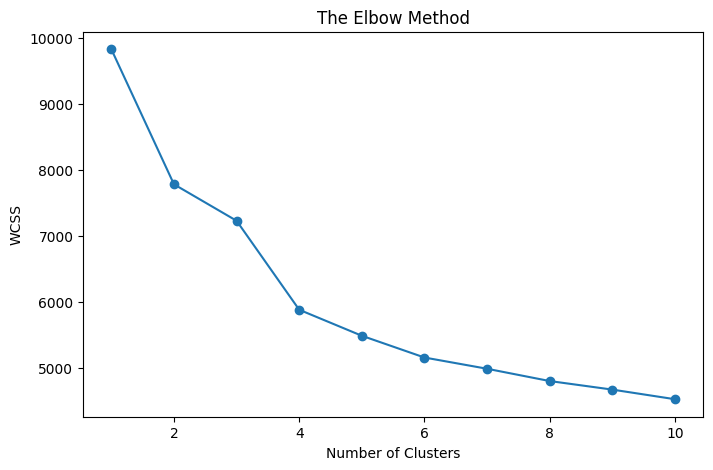

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(range(1,11),wcss,marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
Model = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = Model.fit_predict(ev)
y_kmeans

array([1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 3, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 3,
       2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2,
       3, 2, 2, 2, 3, 2, 3, 3, 1, 1, 1, 2, 2, 3, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 3, 2, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 2, 3, 3, 3, 3, 2, 2, 1, 0, 0, 0, 0, 1,
       1, 1, 3, 2, 2, 3, 2, 3, 3, 3, 1, 3, 3, 3, 1, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 1, 2, 3, 1, 2, 2, 2, 1, 2, 1, 2, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 2, 1, 2, 1, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 1, 1, 1,
       1, 1, 2, 1, 2, 2, 2, 1, 3, 3, 3, 0, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2,
       2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 0, 0, 2, 1, 2, 0, 0, 1,
       1, 1, 2, 2, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2,

In [ ]:
ev['cluster']=y_kmeans

In [ ]:
ev

,brand,model,top_speed_kmh,battery_capacity_kWh,battery_type,number_of_cells,torque_nm,efficiency_wh_per_km,range_km,acceleration_0_100_s,...,cargo_volume_l,seats,drivetrain,segment,length_mm,width_mm,height_mm,car_body_type,source_url,cluster
0,-1.780313,-1.395266,-0.895923,-1.795941,0.0,-0.400452,-1.098189,-0.208888,-1.645677,0.035668,...,-1.662936,-1.252420,0.150119,-1.747965,-2.740640,-2.777234,-0.646612,-1.619530,-1.121394,1
1,-1.780313,-1.387864,-0.895923,-1.795941,0.0,-0.400452,-1.098189,-0.411830,-1.645677,0.035668,...,-1.662936,-1.252420,0.150119,-1.747965,-2.740640,-2.777234,-0.646612,-1.619530,-1.128796,1
2,-1.780313,-1.358257,0.447579,-1.152024,0.0,-0.571102,-0.641818,-0.150905,-1.105684,-0.370564,...,-0.894120,-0.258975,0.150119,0.184241,-1.340043,-1.468285,-0.347366,-0.111192,0.921542,1
3,-1.780313,-1.350855,0.447579,-1.152024,0.0,-0.571102,-0.641818,-0.150905,-1.105684,-0.259774,...,-0.894120,-0.258975,0.150119,0.184241,-1.340043,-1.468285,-0.347366,-0.111192,0.914140,1
4,-1.722223,1.143600,-1.045201,-0.696328,0.0,0.155665,-0.787027,-0.208888,-0.762053,0.220318,...,0.351893,-0.258975,0.150119,0.425766,0.003330,-0.295685,0.749870,-0.111192,-1.565511,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
472,1.530823,-1.321247,0.746135,0.987763,0.0,0.155665,0.872504,0.283969,0.563384,-1.146098,...,0.855600,-0.258975,-1.082438,0.667292,0.294894,0.590583,0.366221,-0.111192,1.106591,3
473,1.530823,-1.313845,0.746135,-0.151475,0.0,0.155665,-0.247680,-0.440821,-0.271150,-0.333634,...,0.855600,-0.258975,1.382676,0.667292,0.294894,0.590583,0.366221,-0.111192,1.091787,2
474,1.530823,1.180610,0.149023,-1.241181,0.0,0.155665,-0.650116,-0.440821,-1.252955,-0.370564,...,-0.841098,-0.258975,1.382676,0.184241,-0.672444,-0.691097,-0.278309,-0.111192,1.706148,2
475,1.530823,1.188012,0.149023,-0.448668,0.0,0.155665,-0.650116,-0.498804,-0.320240,-0.481355,...,-0.841098,-0.258975,1.382676,0.184241,-0.672444,-0.691097,-0.278309,-0.111192,1.713550,2


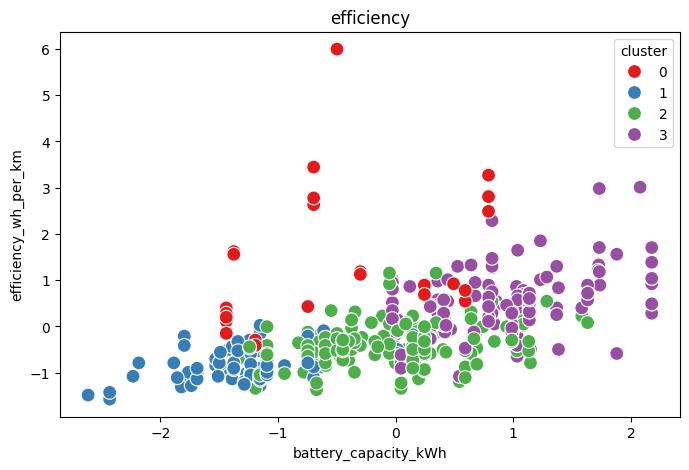

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=ev, x='battery_capacity_kWh', y='efficiency_wh_per_km', hue='cluster', palette='Set1', s=100)
plt.title('efficiency')
plt.xlabel('battery_capacity_kWh')
plt.ylabel('efficiency_wh_per_km')
plt.show()